In [14]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [15]:
# use pandas to import csv file
df = pd.read_csv("D:\DS using python lab\insurance.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Missing values distribution: 
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


In [18]:
# #Checking for duplicates
print(new_df.duplicated().any()) 

True


In [19]:
print(new_df.duplicated())
print(new_df.shape) 

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool
(1338, 7)


In [20]:
#Replacing string values with integer 
new_df["sex"].replace({"male":"1", "female":"0"}, inplace = True) 
print(new_df.head())

   age sex     bmi  children smoker     region      charges
0   19   0  27.900         0    yes  southwest  16884.92400
1   18   1  33.770         1     no  southeast   1725.55230
2   28   1  33.000         3     no  southeast   4449.46200
3   33   1  22.705         0     no  northwest  21984.47061
4   32   1  28.880         0     no  northwest   3866.85520


In [21]:
#Finding unique values in "Region" 
print(new_df["region"].unique()) 

['southwest' 'southeast' 'northwest' 'northeast']


In [22]:
#Replacing string values with int
 
new_df['region'].replace({'northeast':'0','northwest':'1','southeast':'2','southwest':' 3'}, inplace = True)
print(new_df.head())

   age sex     bmi  children smoker region      charges
0   19   0  27.900         0    yes      3  16884.92400
1   18   1  33.770         1     no      2   1725.55230
2   28   1  33.000         3     no      2   4449.46200
3   33   1  22.705         0     no      1  21984.47061
4   32   1  28.880         0     no      1   3866.85520


In [23]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

(1338, 7)
   age sex     bmi  children smoker region      charges
0   19   0  27.900         0    yes      3  16884.92400
1   18   1  33.770         1     no      2   1725.55230
2   28   1  33.000         3     no      2   4449.46200
3   33   1  22.705         0     no      1  21984.47061
4   32   1  28.880         0     no      1   3866.85520


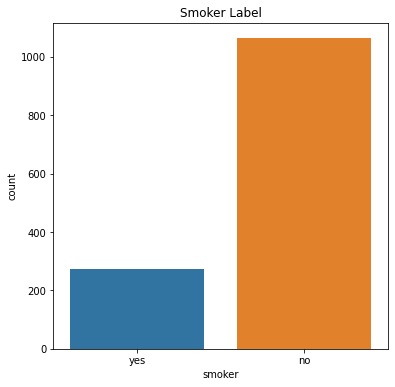

In [24]:

new_df.smoker.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=new_df)
plt.title('Smoker Label')
plt.show()

In [27]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [28]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [31]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 2)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 2)
Number transactions y_test dataset:  (300,)
